In [3]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import datetime
import pandas as pd
import sys
sys.path.append('..')

In [4]:
from models.seir.seir_gabgoh import SEIR

In [5]:
R0 = 2.2 
T_inf = 2.9
T_trans = T_inf/R0
T_inc = 5.2
T_recov_mild = (14 - T_inf)
T_hosp = 5
T_recov_severe = (31.5 - T_inf)
T_death = 32
 
P_severe = 0.2
P_fatal = 0.02
P_mild = 1 - P_severe - P_fatal

N = 7e6
I0 = 1.0

# new_R0 = 0.74
# intervention_amount = R0/new_R0
intervention_day = 100
intervention_amount = 3

params = [T_trans, T_inc, T_inf, T_recov_mild, T_hosp, T_recov_severe, T_death, 
          P_mild, P_severe, P_fatal, N, intervention_day, intervention_amount]

# S, E, I, R_mild, R_severe, R_severe_home, R_fatal, C, D
state_init_values = [(N - I0)/N, 0, I0/N, 0, 0, 0, 0, 0, 0]

In [6]:
solver = SEIR(params, state_init_values)
sol = solver.solve_ode(time_step=1)
states_int_array = (sol.y*N).astype('int')

In [7]:
E = states_int_array[1]
I = states_int_array[2]
H = states_int_array[5]
F = states_int_array[8]

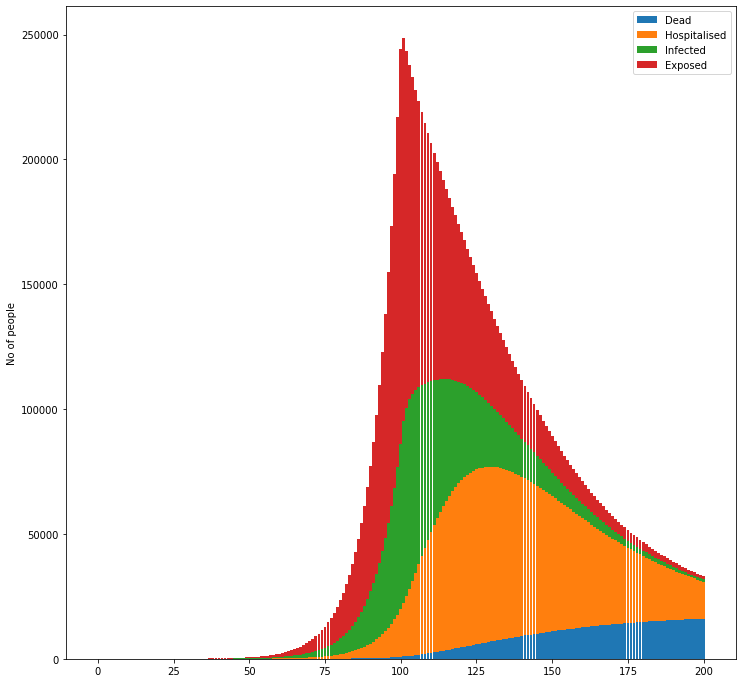

In [8]:
ind = sol.t    # the x locations for the groups
width = 0.95        # the width of the bars: can also be len(x) sequence

plt.figure(figsize=(12, 12))
p1 = plt.bar(ind, F, width)
p2 = plt.bar(ind, H, width, bottom=F)
p3 = plt.bar(ind, I, width, bottom=H+F)
p4 = plt.bar(ind, E, width, bottom=I+H+F)
plt.ylabel('No of people')
plt.legend((p1[0], p2[0], p3[0], p4[0]), ('Dead', 'Hospitalised', 'Infected', 'Exposed'))

plt.show()

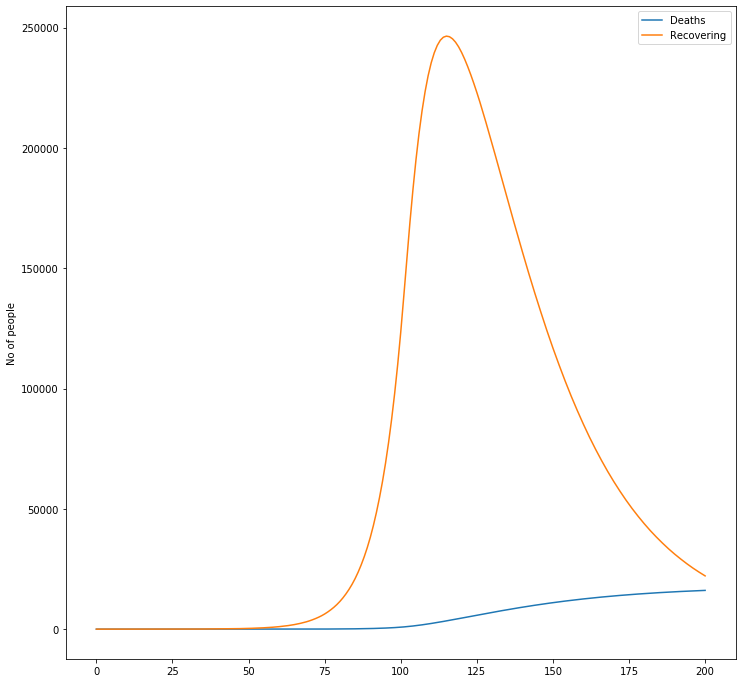

In [9]:
plt.figure(figsize=(12, 12))
plt.plot(ind, F, label='Deaths')
plt.plot(ind, states_int_array[3] + states_int_array[4] + states_int_array[5] + states_int_array[6], label='Recovering')
plt.ylabel('No of people')
plt.legend()
plt.show()

In [10]:
def save_csv(states_int_array):
    today = datetime.datetime.today().date()
    date_list = [today + datetime.timedelta(days=1*x) for x in range(0, states_int_array.shape[1])]
    data = np.concatenate((np.array(date_list).reshape(1, -1), states_int_array)).T
    df = pd.DataFrame(data=data, columns=['date', 'susceptible', 'exposed', 'infectious', 'recovering_mild', 'recovering_severe_home', 
                                          'recovering_severe_hospital', 'recovering_fatal', 'cured', 'dead'])
    df.loc[0, 'infectious'] = int(I0)
    df.to_csv('../sample-model-output.csv', index=False)
    
save_csv(states_int_array)